# **Tasks — Regression (week 1):**

### **Task 2:**



In [1]:
import pandas as pd
import numpy as np

reviews = pd.read_json('https://cseweb.ucsd.edu/classes/fa21/cse258-b/data/fantasy_10000.json.gz', lines=True)

In [135]:
ratings = [review for review in reviews["rating"]]
lengths = [len(review) for review in reviews["review_text"]]

y = np.matrix(ratings).T
X = np.matrix([[1,length] for length in lengths])

theta = np.linalg.inv(X.T*X)*X.T*y
print("Theta([Theta_0; Theta_1]): \n", theta)

Theta([Theta_0; Theta_1]): 
 [[3.68568136e+00]
 [6.87371675e-05]]


In [136]:
sse = sum([x**2 for x in (y - X*theta)]) #Summing up all square errors
mse = sse / len(y) #Dividing by length to get mean square error
print("MSE = ", mse)

MSE =  [[1.55220866]]


### **Task 3:**

In [137]:
import dateutil.parser
dates = [dateutil.parser.parse(review_time) for review_time in reviews["date_added"]]

![](/home/henrikhestnes/Documents/CSE-258-Web-Mining-and-Recommender-Systems/homework_1/Homework-1-task-3-1.png)
![](/home/henrikhestnes/Documents/CSE-258-Web-Mining-and-Recommender-Systems/homework_1/Homework-1-task-3-2.png)


### **Task 4:**

In [138]:
#Using values directly as features
def feature(index):
    feature = [1]
    feature.append(lengths[index])
    feature.append(dates[index].weekday())
    feature.append(dates[index].year-2006)
    return feature

y = np.matrix(ratings).T
X = np.matrix([feature(index) for index in range(0, len(lengths))])

theta = np.linalg.inv(X.T*X)*X.T*y
print("Theta_1: \n", theta[0], 
"\nTheta_2: \n", theta[1],
"\nTheta_3: \n", theta[2],
"\nTheta_4: \n", theta[3])

sse = sum([x**2 for x in (y - X*theta)]) #Summing up all square errors
mse = sse / len(y) #Dividing by length to get mean square error
print("MSE = ", mse)

Theta_1: 
 [[3.29014782]] 
Theta_2: 
 [[5.50923292e-05]] 
Theta_3: 
 [[0.00875072]] 
Theta_4: 
 [[0.05235923]]
MSE =  [[1.53677405]]


In [139]:
#Using one-hot encoding
days = [date.weekday() for date in dates]
years = [date.year for date in dates]

def oneHotFeature(index):
    feature = [1]

    length = lengths[index]
    feature.append(length)

    day = dates[index].weekday()
    dayEncoded = [0]*6
    if day != 0:
        dayEncoded[day-1] = 1
    for elem in dayEncoded:
        feature.append(elem)
    
    year = dates[index].year
    yearEncoded = [0]*11
    if year != 2006:
        yearEncoded[year-2007] = 1
    for elem in yearEncoded:
        feature.append(elem)
    
    return feature


y = np.matrix(ratings).T
X = np.matrix([oneHotFeature(index) for index in range(0, len(lengths))])

theta = np.linalg.inv(X.T*X)*X.T*y
print("Theta_1: \n", theta[0], 
"\nTheta_2: \n", theta[1],
"\nTheta_3: \n", theta[2:8],
"\nTheta_4: \n", theta[8:])

sse = sum([x**2 for x in (y - X*theta)]) #Summing up all square errors
mse = sse / len(y) #Dividing by length to get mean square error
print("MSE = ", mse)

Theta_1: 
 [[4.87171479]] 
Theta_2: 
 [[5.15709386e-05]] 
Theta_3: 
 [[0.04890034]
 [0.1457098 ]
 [0.1066464 ]
 [0.12616832]
 [0.03834177]
 [0.1028469 ]] 
Theta_4: 
 [[-1.58244783]
 [-1.70447417]
 [-1.68316056]
 [-1.67023905]
 [-1.62877001]
 [-1.19956705]
 [-1.10444816]
 [-1.09162361]
 [-1.20861354]
 [-1.23647487]
 [-1.23331225]]
MSE =  [[1.51235787]]


### **Task 5:**

In [147]:
# distributing "random" indices to each set
training_indices = [i for i in range(0, len(lengths), 2)]
test_indices = [i for i in range(1, len(lengths), 2)]

training_ratings = [ratings[i] for i in training_indices]
test_ratings = [ratings[i] for i in test_indices]

In [148]:
#Using values directly as features
training_y = np.matrix(training_ratings).T
test_y = np.matrix(test_ratings).T
training_X = np.matrix([feature(index) for index in training_indices])
trained_theta = np.linalg.inv(training_X.T*training_X)*training_X.T*training_y

sse = sum([x**2 for x in (training_y - training_X*trained_theta)]) #Summing up all square errors
mse = sse / len(test_y) #Dividing by length to get mean square error
print("MSE(training data) = ", mse)
sse = sum([x**2 for x in (test_y - training_X*trained_theta)]) #Summing up all square errors
mse = sse / len(test_y) #Dividing by length to get mean square error
print("MSE(test data) = ", mse)

MSE(training data) =  [[1.54991753]]
MSE(test data) =  [[1.52654798]]


In [149]:
#Using one-hot encoding
training_y = np.matrix(training_ratings).T
test_y = np.matrix(test_ratings).T
training_X = np.matrix([oneHotFeature(index) for index in training_indices])
trained_theta = np.linalg.inv(training_X.T*training_X)*training_X.T*training_y

sse = sum([x**2 for x in (training_y - training_X*trained_theta)]) #Summing up all square errors
mse = sse / len(test_y) #Dividing by length to get mean square error
print("MSE(training data) = ", mse)
sse = sum([x**2 for x in (test_y - training_X*trained_theta)]) #Summing up all square errors
mse = sse / len(test_y) #Dividing by length to get mean square error
print("MSE(test data) = ", mse)

MSE(training data) =  [[1.52069864]]
MSE(test data) =  [[1.51164629]]


### **Task 6:**

![](/home/henrikhestnes/Documents/CSE-258-Web-Mining-and-Recommender-Systems/homework_1/Homework-1-task-6-1.png)


# **Tasks — Classification (week 2):**


### **Task 7:**

In [150]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from urllib.request import urlopen

def readFromURL(URL):
    for l in urlopen(URL):
        yield eval(l)

data = list(readFromURL("https://cseweb.ucsd.edu/classes/fa21/cse258-b/data/beer_50000.json"))
reviews = pd.DataFrame(data)

In [152]:
lengths = [len(review) for review in reviews["review/text"]]
X = np.matrix([[1,length] for length in lengths])
y = [rating >= 4 for rating in reviews["review/overall"]]

model = sklearn.linear_model.LogisticRegression(class_weight='balanced')
model.fit(X,y)
predictions = model.predict(X)

truePos = sum([(predictions[i] and y[i]) for i in range(0, len(y))])
fakePos = sum([(predictions[i] and not y[i]) for i in range(0, len(y))])
trueNeg = sum([(not predictions[i] and not y[i]) for i in range(0, len(y))])
fakeNeg = sum([(not predictions[i] and y[i]) for i in range(0, len(y))])

FPR = fakePos/(fakePos+trueNeg)
FNR = fakeNeg/(fakeNeg+truePos)

BER = 0.5*(FPR + FNR)

print("True Positive = ", truePos)
print("Fake Positive = ", fakePos)
print("True Negative = ", trueNeg)
print("Fake Negative = ", fakeNeg)
print("Balanced Error Rates = ", BER)


True Positive =  14201
Fake Positive =  5885
True Negative =  10503
Fake Negative =  19411
Balanced Error Rates =  0.46830315259572763


### **Task 8:**

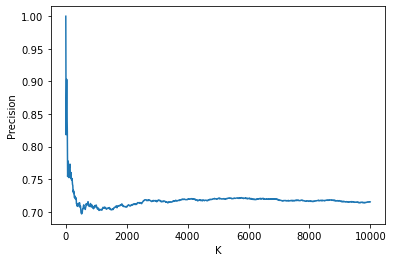

precision@K for k=1: 1.0, k=100: 0.7692307692307693, k=10000: 0.7152437193474127


In [154]:
import matplotlib.pyplot as plt

confidences = model.decision_function(X) 
sortedByConfidence = list(zip(confidences, y))
sortedByConfidence.sort(reverse=True)

K = [K for K in range(1, 10000+1, 10)]
precisionsK = []
for k in K:
    retrievedLabels = [x[1] for x in sortedByConfidence[:k]]
    precisionK = sum(retrievedLabels)/len(retrievedLabels)
    precisionsK.append(precisionK)

plt.plot(K, precisionsK)
plt.xlabel("K")
plt.ylabel("Precision")
plt.show()
print(f"precision@K for k=1: {precisionsK[0]}, k=100: {precisionsK[100//10-1]}, k=10000: {precisionsK[10000//10-1]}")

### **Task 9:**

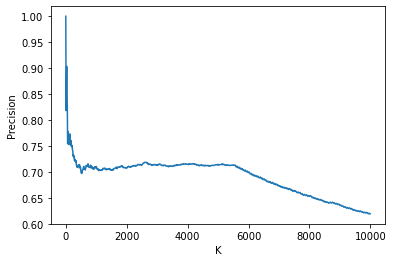

precision@K for k=1: 1.0, k=100: 0.7692307692307693, k=10000: 0.6188569712741467


In [155]:
import matplotlib.pyplot as plt

confidences = model.decision_function(X)
sortedByConfidence = list(zip(abs(confidences), y, predictions))
sortedByConfidence.sort(reverse=True)

K = [K for K in range(1, 10000+1, 10)]
precisionsK = []
for k in K:
    retrievedLabels = [[x[1], x[2]] for x in sortedByConfidence[:k]]
    precisionK = 0
    for elem in retrievedLabels:
        precisionK += (int)(elem[0]==elem[1])
    precisionK = precisionK/k
    precisionsK.append(precisionK)
    
plt.plot(K, precisionsK)
plt.xlabel("K")
plt.ylabel("Precision")
plt.show()

print(f"precision@K for k=1: {precisionsK[0]}, k=100: {precisionsK[100//10-1]}, k=10000: {precisionsK[10000//10-1]}")